# BayWheels bike-sharing system
#### by Eeke Brouwers

## Introduction

BayWheels (until May 2019 known as Ford GoBike) is a public bike-sharing system in greater San Francisco Bay Area. In this project I'll analyse the use of BayWheels’ bike-sharing system in 2019. 

## Preliminary Wrangling


### Gather data

In [14]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> The csv file "201902-fordgobike-tripdata.csv" provided by Udacity contains bike-sharing data from BayWheels from February 2019 only. Data of the remaining months of 2019 are directly downloaded from BayWheels (https://www.sfmta.com/getting-around/bike/bike-share).

In [15]:
# Load data
df_bike02 = pd.read_csv('201902-fordgobike-tripdata.csv')

In [16]:
# Import modules
import requests, zipfile, os, shutil, io

In [17]:
# Create list of to be downloaded urls 
months = [201901, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912]
urls_list = []
for month in months:
    if month < 201905: 
        url = "https://s3.amazonaws.com/baywheels-data/" + str(month) + "-fordgobike-tripdata.csv.zip"
    else:
        url = "https://s3.amazonaws.com/baywheels-data/" + str(month) + "-baywheels-tripdata.csv.zip"
    urls_list.append(url)

In [18]:
# Create new folder to store all 2019 csv files from Ford GoBike 
folder_name = 'FordGoBike_2019_files'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [58]:
shutil.rmtree('FordGoBike_2019_files')

In [19]:
# Download and extract zip files and move to new folder 'FordGoBike_2019_files'
for url in urls_list:
    # Get zip files 
    r = requests.get(url)
    print(r)

    # Set folder name for extracted zip files
    zip_folder = url.split('/')[-1]

    # Read and extract zipfile
    with zipfile.ZipFile(io.BytesIO(r.content), 'r') as zf:
        zf.extractall(zip_folder)
    
    # Move extracted csv file to folder 'FordGoBike_2019_files'
    file_name = url.split('/')[-1].split('.zip')[0]
    source = zip_folder + '/' + file_name
    destination = os.getcwd() + '/' + folder_name
    shutil.move(source, destination)

    # Remove zip folder
    shutil.rmtree(zip_folder)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [20]:
import glob

In [21]:
# Get CSV files list from a folder
path = folder_name
csv_files = glob.glob(path + "/*.csv")

# Create list with dataframes from the csv_files and check shape and columns of the different dataframes
df_list = []
for file in csv_files:
    # Include dtype='unicode' to prevent dtype and low memory errors 
    data = pd.read_csv(file, dtype='unicode')
    df_list.append(data)
    print(str(file))
    print(data.shape)
    print(list(data.columns))
    print()

# Concatenate all dataframes into one dataframe df_bike_complete
# Include sort=False to prevent columns being organized alphabetically
df_bike2019 = pd.concat(df_list, ignore_index=True, sort=False)

# Also possible : 
# df_bike_complete = pd.concat(map(pd.read_csv, glob.glob(path + "/*.csv")), sort=False)

FordGoBike_2019_files/201906-baywheels-tripdata.csv
(191772, 15)
['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'bike_share_for_all_trip', 'rental_access_method']

FordGoBike_2019_files/201907-baywheels-tripdata.csv
(258102, 15)
['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'bike_share_for_all_trip', 'rental_access_method']

FordGoBike_2019_files/201905-baywheels-tripdata.csv
(182163, 14)
['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'en

### Data wrangling

#### DF_BIKE02 data

In [22]:
# Dataframe overview
df_bike02.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [23]:
# Get info 
print(df_bike02.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None


In [24]:
def categories(df, column):
    # Takes a dataframe and column name (as 'column_name') and prints the unique values and value counts of a dataframe column
    print(df[column].unique())
    print(df[column].value_counts())

In [25]:
# Get categories for user type, gender and bike share for all trip column
categories(df_bike02, 'user_type')
categories(df_bike02, 'member_gender')
categories(df_bike02, 'bike_share_for_all_trip')

['Customer' 'Subscriber']
Subscriber    163544
Customer       19868
Name: user_type, dtype: int64
['Male' nan 'Other' 'Female']
Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64
['No' 'Yes']
No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64


In [26]:
# Duplicated rows
df_bike02[df_bike02.duplicated(keep=False)]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [27]:
# Number of unique values for all columns
print(df_bike02.nunique())

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64


In [28]:
# Sort by start station id
df_bike02.sort_values(by=['start_station_id'])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
108908,473,2019-02-12 20:58:53.5270,2019-02-12 21:06:47.4990,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,61.0,Howard St at 8th St,37.776513,-122.411306,1466,Subscriber,1965.0,Male,No
120760,397,2019-02-11 16:42:02.3470,2019-02-11 16:48:39.7740,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,3555,Subscriber,1994.0,Male,No
120770,411,2019-02-11 16:41:14.8670,2019-02-11 16:48:06.6600,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,5193,Subscriber,1972.0,Female,No
120807,322,2019-02-11 16:40:16.1980,2019-02-11 16:45:38.3390,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,47.0,4th St at Harrison St,37.780955,-122.399749,1196,Subscriber,1978.0,Male,No
120883,589,2019-02-11 16:28:02.0520,2019-02-11 16:37:51.8130,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,343.0,Bryant St at 2nd St,37.783172,-122.393572,137,Subscriber,1974.0,Female,No
120886,495,2019-02-11 16:28:57.7130,2019-02-11 16:37:12.9130,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,26.0,1st St at Folsom St,37.787290,-122.394380,2916,Subscriber,1990.0,Male,No
120894,433,2019-02-11 16:29:20.4250,2019-02-11 16:36:34.4000,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,685,Subscriber,1956.0,Male,No
12377,381,2019-02-27 17:40:28.7440,2019-02-27 17:46:50.3230,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,33.0,Golden Gate Ave at Hyde St,37.781650,-122.415408,5857,Subscriber,1994.0,Female,No
121023,341,2019-02-11 16:17:04.6980,2019-02-11 16:22:45.8700,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,16.0,Steuart St at Market St,37.794130,-122.394430,1812,Subscriber,1982.0,Male,No
12338,518,2019-02-27 17:40:14.8740,2019-02-27 17:48:53.7220,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,91.0,Berry St at King St,37.771762,-122.398438,5000,Subscriber,1991.0,Female,No


In [29]:
# Descriptive statistics for numeric variables
df_bike02.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### DF_BIKE2019 data

In [30]:
# Dataframe overview
df_bike2019.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,81695,2019-06-30 18:16:09.7730,2019-07-01 16:57:45.5920,109,17th St at Valencia St,37.7633158,-122.4219039,56,Koshland Park,37.77341397,-122.4273169041,1502,Subscriber,No,NaN
1,74260,2019-06-30 18:09:55.8300,2019-07-01 14:47:36.6810,50,2nd St at Townsend St,37.780526,-122.390288,101,15th St at Potrero Ave,37.7670785046,-122.4073585868,2526,Customer,No,NaN
2,59603,2019-06-30 15:40:31.0380,2019-07-01 08:13:54.3490,23,The Embarcadero at Steuart St,37.791464,-122.391034,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2427,Subscriber,No,NaN
3,67932,2019-06-30 12:49:47.7810,2019-07-01 07:42:00.5430,169,Bushrod Park,37.8465156,-122.2653043,248,Telegraph Ave at Ashby Ave,37.8559558,-122.2597949,1261,Customer,No,NaN
4,48894,2019-06-30 17:21:00.0550,2019-07-01 06:55:54.9960,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1070,Customer,No,NaN


In [31]:
# Get info
print(df_bike2019.shape)
print(df_bike2019.info())

(2323571, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323571 entries, 0 to 2323570
Data columns (total 15 columns):
duration_sec               object
start_time                 object
end_time                   object
start_station_id           object
start_station_name         object
start_station_latitude     object
start_station_longitude    object
end_station_id             object
end_station_name           object
end_station_latitude       object
end_station_longitude      object
bike_id                    object
user_type                  object
bike_share_for_all_trip    object
rental_access_method       object
dtypes: object(15)
memory usage: 265.9+ MB
None


In [32]:
# Missing values
df_bike2019.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80537
start_station_name           79936
start_station_latitude           0
start_station_longitude          0
end_station_id               82705
end_station_name             82153
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2202733
dtype: int64

In [33]:
# Get categories for user-type, bike-share-for-all-trip and rental-access-method column
categories(df_bike2019, 'user_type')
categories(df_bike2019, 'bike_share_for_all_trip')
categories(df_bike2019, 'rental_access_method')

['Subscriber' 'Customer']
Subscriber    1857622
Customer       465949
Name: user_type, dtype: int64
['No' 'Yes' nan]
No     1920099
Yes     160213
Name: bike_share_for_all_trip, dtype: int64
[nan 'app' 'clipper']
app        108010
clipper     12828
Name: rental_access_method, dtype: int64


In [34]:
# Number of unique values for all columns
print(df_bike2019.nunique())

duration_sec                 14846
start_time                 2318717
end_time                   2318719
start_station_id               436
start_station_name             446
start_station_latitude       74719
start_station_longitude      75943
end_station_id                 436
end_station_name               446
end_station_latitude         76904
end_station_longitude        77995
bike_id                      10978
user_type                        2
bike_share_for_all_trip          2
rental_access_method             2
dtype: int64


In [35]:
# Different station names for same station id
df = df_bike2019.groupby(['start_station_id','start_station_name']).size().reset_index().rename(columns={0:'count'})
print(df[df['start_station_id'].duplicated()].count())
df[df['start_station_id'].duplicated(keep=False)]

start_station_id      10
start_station_name    10
count                 10
dtype: int64


,start_station_id,start_station_name,count
137,234,Farnam St at Fruitvale Ave,76
138,234,Fruitvale Ave at International Blvd,72
182,277,Morrison Ave at Julian St,1950
183,277,W Julian St at N Morrison St,1124
196,289,5th St at Taylor St,898
197,289,N 3rd St at E Taylor St,118
199,290,George St at 1st St,309
200,290,Jackson St at N 1st St,100
227,316,1st St at San Carlos Ave,333
228,316,1st St at San Carlos St,455


### Quality Issues

- Missing values in columns start_station_id, start_station_name, end_station_id, end_station_name. It is not clear whether the start and end station id/name could not be detected or whether these concern false bike trips. To be on the safe side, rows with missing values in these columns are cleaned. 

- Erroneous datatypes, all are object type

- Incorrect birth years (e.g. 1878 and 1900). But these will be addressed in the univariate plot section

### Tidiness issues

- Two dataframes instead of one

### Unaddressed issues

- The number of station id's is lower than the number of station names. It seems that 9 id's are connected to 2 different addresses and 1 even to 3 different addresses. Most station names seem nearly the same and likely locate on crossings where some bike coordinates belong to one street and some to the other. This issue is not cleaned here. 

### Cleaning data

In [36]:
# Make a copy
bike02_clean = df_bike02.copy()
bike2019_clean = df_bike2019.copy()

### Issue #1: Two dataframes instead of one

#### Define
- Concatenate dataframes and order by date

#### Code

In [37]:
# Concatenate dataframes
bike2019_clean = pd.concat([bike2019_clean, bike02_clean], ignore_index=True, sort=False)
bike2019_clean = bike2019_clean.sort_values(by='start_time')

#### Test

In [38]:
print(bike2019_clean.shape)
bike2019_clean.head()

(2506983, 17)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,member_birth_year,member_gender
824118,226,2019-01-01 00:07:10.5760,2019-01-01 00:10:57.1960,245,Downtown Berkeley BART,37.870139,-122.268422,247,Fulton St at Bancroft Way,37.8677892,-122.2658964,5117,Customer,No,NaN,NaN,NaN
824090,1767,2019-01-01 00:08:39.6590,2019-01-01 00:38:06.8480,16,Steuart St at Market St,37.79413,-122.39443,115,Jackson Playground,37.7650259,-122.3987734,1705,Customer,No,NaN,NaN,NaN
824117,182,2019-01-01 00:09:56.2110,2019-01-01 00:12:58.7480,269,Telegraph Ave at Carleton St,37.8623199,-122.258801,240,Haste St at Telegraph Ave,37.8660431,-122.2588044,4621,Subscriber,Yes,NaN,NaN,NaN
824116,565,2019-01-01 00:11:03.4410,2019-01-01 00:20:29.2680,269,Telegraph Ave at Carleton St,37.8623199,-122.258801,243,Bancroft Way at College Ave,37.8693603,-122.2543374,4783,Subscriber,Yes,NaN,NaN,NaN
824112,710,2019-01-01 00:14:48.3980,2019-01-01 00:26:38.4210,163,Lake Merritt BART Station,37.7973195,-122.2653199,159,24th St at Market St,37.8160598,-122.2782444,4892,Customer,No,NaN,NaN,NaN


### Issue #2: Missing values

#### Define
- Remove rows with missing values in the columns station id and station name

#### Code

In [39]:
# Drop rows with missing station if or station name
bike2019_clean.drop((bike2019_clean[bike2019_clean['start_station_id'].isnull()].index), inplace=True)
bike2019_clean.drop((bike2019_clean[bike2019_clean['end_station_id'].isnull()].index), inplace=True)

#### Test

In [40]:
print(bike2019_clean[bike2019_clean['start_station_id'].isnull()])
print(bike2019_clean[bike2019_clean['end_station_id'].isnull()])

Empty DataFrame
Columns: [duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, bike_share_for_all_trip, rental_access_method, member_birth_year, member_gender]
Index: []
Empty DataFrame
Columns: [duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, bike_share_for_all_trip, rental_access_method, member_birth_year, member_gender]
Index: []


In [41]:
bike2019_clean.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id                 0
start_station_name               0
start_station_latitude           0
start_station_longitude          0
end_station_id                   0
end_station_name                 0
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     144280
rental_access_method       2385400
member_birth_year          2232307
member_gender              2232307
dtype: int64

### Issue #3:  Erroneous datatypes

#### Define
- Change datatypes of the following columns: 
    1. duration_sec => int
    2. start_time => datetime
    3. end_time => datetime
    4. start_station_id => string
    6. start_station_latitude => float
    7. start_station_longitude => float
    8. end_station_id => string
    10. end_station_latitude => float
    11. end_station_longitude => float
    12. bike_id => string
    13. user_type => categorical
    14. bike_share_for_all_trip => catgerorical
    15. rental_access_method => categorical
    16. member_birth_year => int or float (to calculate the age)
    17. member_gender => categorical

#### Code

In [42]:
def to_datetime(df, column_names):
    # Takes a dataframe and list of column names to convert to datetime object
    for column in column_names:
        df[column] = pd.to_datetime(df[column])

def to_float(df, column_names):       
    # Takes a dataframe and list of column names to convert to string object
    for column in column_names:
        df[column] = df[column].astype(float)
        
def to_string(df, column_names):       
    # Takes a dataframe and list of column names to convert to string object
    for column in column_names:
        df[column] = df[column].astype(float).astype(str)
        
def to_integer(df, column_names):        
    # Takes a dataframe and list of column names to convert to int object
    for column in column_names:
        try:
            df[column] = df[column].astype(float).astype(int)
        except:
            df[column] = df[column].astype(float)
                
def to_categorical(df, column_names):
    # Takes a dataframe and list of column names to convert to categorical object
    for column in column_names:
        df[column] = df[column].astype('category')

def to_boolean(df, column_names):
    # Takes a dataframe and list of column names to convert to boolean object
    for column in column_names:
        df[column] = df[column].astype(bool)

In [43]:
# Change datatype
to_datetime(bike2019_clean, ['start_time', 'end_time'])
to_float(bike2019_clean, ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'])
to_string(bike2019_clean, ['start_station_id', 'end_station_id', 'bike_id'])
to_integer(bike2019_clean, ['duration_sec', 'member_birth_year']) 
to_categorical(bike2019_clean, ['user_type', 'member_gender', 'rental_access_method', 'bike_share_for_all_trip']) 

#### Test

In [44]:
bike2019_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 824118 to 1282023
Data columns (total 17 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
bike_share_for_all_trip    category
rental_access_method       category
member_birth_year          float64
member_gender              category
dtypes: category(4), datetime64[ns](2), float64(5), int64(1), object(5)
memory usage: 266.3+ MB


In [45]:
bike2019_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,member_birth_year,member_gender
824118,226,2019-01-01 00:07:10.576,2019-01-01 00:10:57.196,245.0,Downtown Berkeley BART,37.870139,-122.268422,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,5117.0,Customer,No,NaN,NaN,NaN
824090,1767,2019-01-01 00:08:39.659,2019-01-01 00:38:06.848,16.0,Steuart St at Market St,37.794130,-122.394430,115.0,Jackson Playground,37.765026,-122.398773,1705.0,Customer,No,NaN,NaN,NaN
824117,182,2019-01-01 00:09:56.211,2019-01-01 00:12:58.748,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,4621.0,Subscriber,Yes,NaN,NaN,NaN
824116,565,2019-01-01 00:11:03.441,2019-01-01 00:20:29.268,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,243.0,Bancroft Way at College Ave,37.869360,-122.254337,4783.0,Subscriber,Yes,NaN,NaN,NaN
824112,710,2019-01-01 00:14:48.398,2019-01-01 00:26:38.421,163.0,Lake Merritt BART Station,37.797320,-122.265320,159.0,24th St at Market St,37.816060,-122.278244,4892.0,Customer,No,NaN,NaN,NaN


### Reassessing data

In [46]:
# Difference between start and end time in seconds
bike2019_clean['diff_start_end_time'] = pd.to_timedelta(bike2019_clean['end_time']).dt.seconds - pd.to_timedelta(bike2019_clean['start_time']).dt.seconds

In [47]:
# Compare diff_start_end_time with duration_sec
bike2019_clean[abs(bike2019_clean['diff_start_end_time'] - bike2019_clean['duration_sec']) != 0].shape

(1205155, 18)

In [48]:
# Compare diff_start_end_time with duration_sec
bike2019_clean[abs(bike2019_clean['diff_start_end_time'] - bike2019_clean['duration_sec']) > 1]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,member_birth_year,member_gender,diff_start_end_time
821687,1910,2019-01-01 23:28:17.782,2019-01-02 00:00:08.153,27.0,Beale St at Harrison St,37.788059,-122.391865,10.0,Washington St at Kearny St,37.795393,-122.404770,333.0,Customer,No,NaN,NaN,NaN,-84489
821680,3967,2019-01-01 23:32:24.142,2019-01-02 00:38:31.172,237.0,Fruitvale BART Station,37.775232,-122.224498,225.0,23rd Ave at Foothill Blvd,37.785192,-122.234382,4727.0,Subscriber,No,NaN,NaN,NaN,-82433
821670,6630,2019-01-01 23:32:33.260,2019-01-02 01:23:03.805,237.0,Fruitvale BART Station,37.775232,-122.224498,228.0,Foothill Blvd at Harrington Ave,37.779930,-122.217728,4856.0,Subscriber,No,NaN,NaN,NaN,-79770
821669,6723,2019-01-01 23:32:40.014,2019-01-02 01:24:43.246,237.0,Fruitvale BART Station,37.775232,-122.224498,227.0,Foothill Blvd at Fruitvale Ave,37.783757,-122.222603,4891.0,Subscriber,No,NaN,NaN,NaN,-79677
821679,3837,2019-01-01 23:36:20.704,2019-01-02 00:40:18.002,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,5290.0,Subscriber,No,NaN,NaN,NaN,-82562
821674,3568,2019-01-01 23:57:20.921,2019-01-02 00:56:49.298,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,3460.0,Subscriber,No,NaN,NaN,NaN,-82831
815437,55814,2019-01-02 16:16:01.591,2019-01-03 07:46:16.441,311.0,Paseo De San Antonio at 2nd St,37.333798,-121.886943,318.0,San Carlos St at Market St,37.330698,-121.888979,2595.0,Customer,No,NaN,NaN,NaN,-30585
813730,62856,2019-01-02 17:03:54.277,2019-01-03 10:31:31.170,81.0,Berry St at 4th St,37.775880,-122.393170,49.0,S Park St at 3rd St,37.780760,-122.394989,2105.0,Customer,No,NaN,NaN,NaN,-23543
815863,4243,2019-01-02 23:01:55.958,2019-01-03 00:12:39.242,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,4320.0,Subscriber,Yes,NaN,NaN,NaN,-82156
815860,4161,2019-01-02 23:06:30.687,2019-01-03 00:15:51.763,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,25.0,Howard St at 2nd St,37.787522,-122.397405,5460.0,Subscriber,Yes,NaN,NaN,NaN,-82239


#### Quality issue #4

- 5531 rows where 'duration_sec' differs with more than 1 second from the difference between the start and end time of the trip. Drop these rows. 
- Drop newly generated 'diff_start_end_time' column after testing

In [49]:
# Drop rows 
bike2019_clean.drop((bike2019_clean[abs(bike2019_clean['diff_start_end_time'] - bike2019_clean['duration_sec']) > 10].index), inplace=True)

#### Test

In [50]:
bike2019_clean[abs(bike2019_clean['diff_start_end_time'] - bike2019_clean['duration_sec']) > 10]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,member_birth_year,member_gender,diff_start_end_time


In [51]:
# Drop column and check if is removed from dataframe
bike2019_clean.drop(columns=['diff_start_end_time'], inplace=True)
bike2019_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2401728 entries, 824118 to 1282039
Data columns (total 17 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
bike_share_for_all_trip    category
rental_access_method       category
member_birth_year          float64
member_gender              category
dtypes: category(4), datetime64[ns](2), float64(5), int64(1), object(5)
memory usage: 265.7+ MB


### Creating new columns

- Duration in minutes
- Age of the members from birth year

In [52]:
# Create column with bike trip duration in minutes and place behind duration in seconds
new_column = bike2019_clean['duration_sec']/60
loc = bike2019_clean.columns.get_loc("duration_sec")+1
bike2019_clean.insert(loc, 'duration_min', new_column)

In [53]:
# Descriptive statistics for trip duration
bike2019_clean[['duration_sec', 'duration_min']].describe()

,duration_sec,duration_min
count,2.401728e+06,2.401728e+06
mean,7.628199e+02,1.271366e+01
std,1.115031e+03,1.858384e+01
min,6.000000e+01,1.000000e+00
25%,3.580000e+02,5.966667e+00
50%,5.690000e+02,9.483333e+00
75%,8.820000e+02,1.470000e+01
max,7.757600e+04,1.292933e+03


In [54]:
# Create column with member age and place behind member birth year
new_column = 2019 - bike2019_clean['member_birth_year']
loc = bike2019_clean.columns.get_loc("member_birth_year")+1
bike2019_clean.insert(loc, 'member_age', new_column)

In [55]:
# Descriptive statistics for trip duration
bike2019_clean[['member_birth_year','member_age']].describe()

,member_birth_year,member_age
count,174669.000000,174669.000000
mean,1984.800938,34.199062
std,10.119319,10.119319
min,1878.000000,18.000000
25%,1980.000000,27.000000
50%,1987.000000,32.000000
75%,1992.000000,39.000000
max,2001.000000,141.000000


In [56]:
# Get dataframe info
bike2019_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2401728 entries, 824118 to 1282039
Data columns (total 19 columns):
duration_sec               int64
duration_min               float64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
bike_share_for_all_trip    category
rental_access_method       category
member_birth_year          float64
member_age                 float64
member_gender              category
dtypes: category(4), datetime64[ns](2), float64(7), int64(1), object(5)
memory usage: 302.3+ MB


In [57]:
# Save gathered, assessed and cleaned dataset to a CSV file
bike2019_clean.to_csv('2019_baywheels_tripdata_clean.csv')

### What is the structure of your dataset?

> The dataset has 24017528 rows and 19 columns wih information on bike trips made with the bike sharing system of Ford GoBike/Bay Wheels during the year 2019. Available information: 
- duration of the trip in seconds and minutes, 
- info on the start and end of the trip (incl. time, station id, station name and coordinates) 
- id of the bike 
- user type (Subscriber, Costumer)
- whether user is part of the 'bike share for all' program (yes/no)
- on the rental access method (app, clipper)
- user's birth year and age
- user's gender (Female, Male, Other)
 
### What is/are the main feature(s) of interest in your dataset?

> When are the bikes used and by who? <br>
> Does the duration of trips differ depending on the hour, day, month, or on the type of user?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Variables of interest are trip duration, start time of the trip, and user variable including age, gender, type (customer/subscriber) and the method they used for accessing the bike. 

## Univariate Exploration

#### 1. Distribution of bike-trip duration 

In [44]:
# Dataframe for analysis
data = bike2019_clean

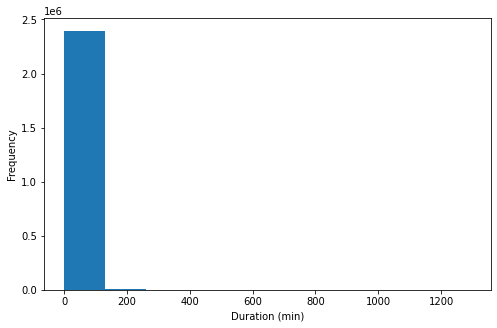

In [45]:
# Histogram
plt.figure(figsize=[8,5])
plt.hist(data = data, x = 'duration_min')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.show()

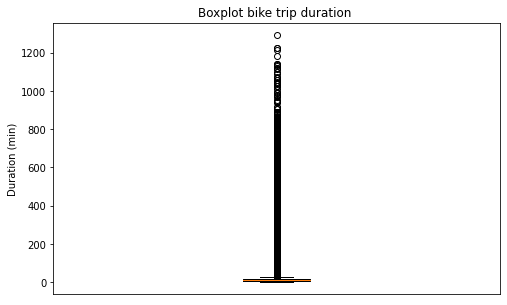

In [46]:
# Boxplot
plt.figure(figsize=[8,5])
plt.boxplot(data = data, x = 'duration_min')
plt.ylabel('Duration (min)')
plt.xticks([])
plt.title('Boxplot bike trip duration ')
plt.show()

In [47]:
# Descriptive statistics 
data.duration_min.describe()

count    2.401728e+06
mean     1.271366e+01
std      1.858384e+01
min      1.000000e+00
25%      5.966667e+00
50%      9.483333e+00
75%      1.470000e+01
max      1.292933e+03
Name: duration_min, dtype: float64

> Both histogram and boxplot suggest a right-skewed distribution with possible outliers to the right. Looking at the descriptive statistics, the mean bike trip duration lasted about 12.7 minute and 75% of the trips lasted less then 14.7 minutes. The max value in the data is 1292.9 minutes. As the duration is based on the start and end time of the trip it is difficult to say what causes these possible outliers, but my guess is that the bike was either incorrectly placed back into the station or someone took the bike for the day (e.g. not being close to a station to return the bike). Also very low durations may reflect outliers, for example when someone returns the bikes due to bike issues or change of mind. 

>Below I calculate the number of ourliers according to the interquartile range (IQR) method, which considers data points to be outliers when <Q1-1.5IQR or >Q3+1.5IQR. Q1=first quartile, Q3=thrid quartile and IQR=Q3-Q1

In [48]:
def outliers(df, column_name):
    # Takes a dataframe and column name and print the number outliers according to the IQR method and its descriptive statistics
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3-q1
    outliers_lower=df[df[column_name]<(q1-1.5*iqr)]
    outliers_upper=df[df[column_name]>(q3+1.5*iqr)]
    outliers_total_count = outliers_lower[column_name].count() + outliers_upper[column_name].count()
    outliers_pct = (outliers_total_count/df.shape[0])*100
    # Print
    print('Number of lower outliers: ' + str(outliers_lower[column_name].count()))
    print('Number of upper outliers: ' + str(outliers_upper[column_name].count()))
    print('Percentage outliers = ' + str(outliers_pct))
    print()
    print('Descriptive statistics for lower outliers:')
    print(outliers_lower[column_name].describe())
    print()
    print('Descriptive statistics for upper outliers:')
    print(outliers_upper[column_name].describe())

In [49]:
# Outliers
outliers(data, 'duration_min')

Number of lower outliers: 0
Number of upper outliers: 131969
Percentage outliers = 5.494752111812828

Descriptive statistics for lower outliers:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: duration_min, dtype: float64

Descriptive statistics for upper outliers:
count    131969.000000
mean         55.663452
std          61.422491
min          27.800000
25%          31.150000
50%          37.416667
75%          52.533333
max        1292.933333
Name: duration_min, dtype: float64


> The IQR method did not detect any lower outliers, but a considerable amount of upper ouliers (5.5% of all data). The upper outliers have a minimum value of 27.8 and 75% has a value of 50 and below. A bike trip between 27.8 and 50 minutes is not very extreme or unthinkable in my believe. On the other hand, some outliers concern bike trips lasting several hours up to an entire day, which seem unlikely to reflect uninterupted trips. These extreme values may distort the data. As neither keeping nor eliminating the outliers seems ideal here I will compare the two during further analysis. 

> To get a better insight in the distribution of trip duration (without eliminating outliers) I will try a log transformation (as data has a long tail towards to higher end). 

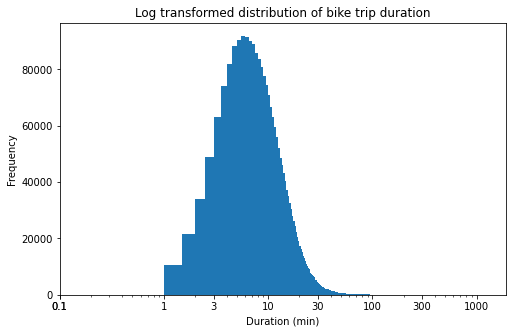

In [50]:
# Log transformation
binsize = 0.5
bins = np.arange(0, data['duration_min'].max()+binsize, binsize)

ticks = [0.1, 0.1, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[8,5])
plt.hist(data = data, x = 'duration_min', bins=bins)
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.title('Log transformed distribution of bike trip duration')
plt.xscale('log')
plt.xticks(ticks, labels)
plt.show()

> The log transformation shows that the data is unimodal, with a peak around 6 minutes. The minimum trip durations lasts 1 minute. 

> __Conclusion__ <br> Trip duration data are highly right-skewed and log transformation was needed. Outliers seem to skew the data but the IQR method for defining outliers seemed to cut off possibly valuable data. As neither keeping nor discarding outliers seems optimal, both options will be compared during further analysis on trip duration.

#### 2. Distribution of bike-trip frequency throughout the year

In [51]:
# Extract date, store in new column, and convert back to datetime object
data['start_date'] = data['start_time'].dt.date # or data['start_date'] = data['start_time'].dt.strftime('%Y-%m-%d')
data['start_date'].values

array([datetime.date(2019, 1, 1), datetime.date(2019, 1, 1),
       datetime.date(2019, 1, 1), ..., datetime.date(2019, 12, 31),
       datetime.date(2019, 12, 31), datetime.date(2019, 12, 31)],
      dtype=object)

[Text(0, 0, 'January'),
 Text(31, 0, 'February'),
 Text(62, 0, 'March'),
 Text(93, 0, 'April'),
 Text(124, 0, 'May'),
 Text(155, 0, 'June'),
 Text(186, 0, 'July'),
 Text(217, 0, 'August'),
 Text(248, 0, 'September'),
 Text(279, 0, 'October'),
 Text(310, 0, 'November'),
 Text(341, 0, 'December')]

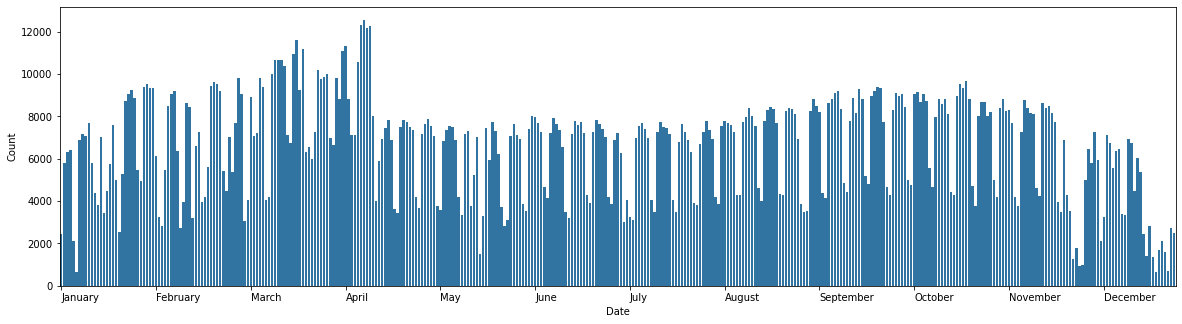

In [157]:
# Create figure
fig = plt.figure(figsize=[20,5])
ax = fig.add_axes([.125,.125,.775,.775])

# Plot
base_color = sb.color_palette()[0]
sb.countplot(data = data, x = 'start_date', color=base_color)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor') # Align labels to ticks
plt.xlabel('Date')
plt.ylabel('Count')

# Reduced number of ticks on x-axis
plt.xticks(range(0,365,31),rotation=0, ha='left')

# Create new labels for x axis
new_labels = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

# Set the new tick labels
ax.set_xticklabels(new_labels)


[Text(0, 0, 'January'),
 Text(31, 0, 'February'),
 Text(62, 0, 'March'),
 Text(93, 0, 'April'),
 Text(124, 0, 'May'),
 Text(155, 0, 'June'),
 Text(186, 0, 'July'),
 Text(217, 0, 'August'),
 Text(248, 0, 'September'),
 Text(279, 0, 'October'),
 Text(310, 0, 'November'),
 Text(341, 0, 'December')]

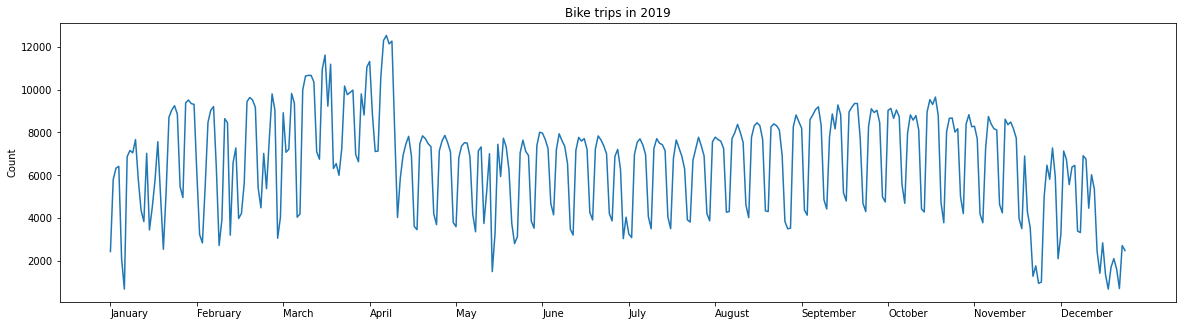

In [160]:
fig = plt.figure(figsize=[20,5])
ax = fig.add_axes([.125,.125,.775,.775])

# Count bike trips per date
date_freq = data.groupby('start_date').size()
date_freq = date_freq.reset_index(name='count')

# Plot
sb.lineplot(data=date_freq, x=date_freq['start_date'].astype(str), y='count')
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor') # Align labels to ticks
plt.xlabel('')
plt.ylabel('Count')
plt.title('Bike trips in 2019')

# Reduced number of ticks on x-axis
plt.xticks(range(0,365,31),rotation=0, ha='left')

# Create new labels for x axis
new_labels = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

# Set the new tick labels
ax.set_xticklabels(new_labels)

>__Conclusion__ <br> 
Interestingly, the number of bike trips fluctuates somewhat during the year, but more strongly it differs from day to day. There are rhythmic peaks that span several days. Let's see which weekdays these peaks concern in the next paragraph. 

#### 3. Distribution of bike-trip frequency throughout the week

In [55]:
# Create column for day
data['start_day'] = data['start_time'].dt.day_name()
data['start_day'].value_counts()

Thursday     411012
Tuesday      409570
Wednesday    400447
Friday       381418
Monday       379646
Saturday     220175
Sunday       199460
Name: start_day, dtype: int64

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

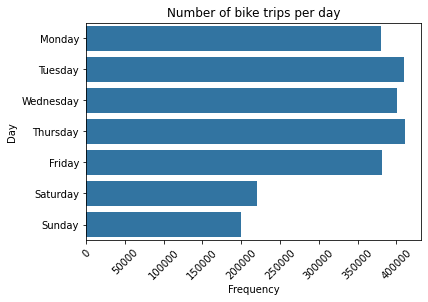

In [56]:
# Plot 
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
base_color = sb.color_palette()[0]
sb.countplot(data=data, y='start_day', color=base_color, order=order_days).set(title='Number of bike trips per day')
plt.xlabel('Frequency')
plt.ylabel('Day')
plt.xticks(rotation=45)

In [57]:
# Create column with weekday or weekend category
wknd_list = ['Saturday', 'Sunday']
data['start_day_type'] = data.start_day.apply(lambda x: 'Weekend' if x in wknd_list else 'Weekday')
data['start_day_type'].value_counts()

Weekday    1982093
Weekend     419635
Name: start_day_type, dtype: int64

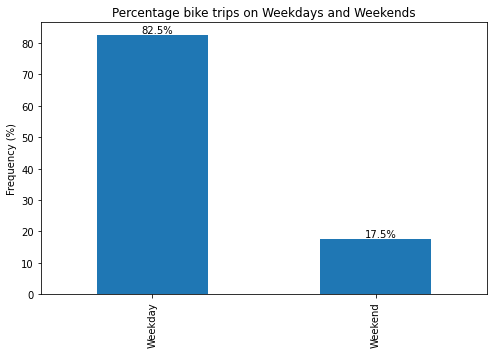

In [58]:
# Get percentage for weekends and weekdays
df = data.start_day_type.value_counts(normalize=True)*100

fig = plt.figure(figsize=[8,5])
# Plot data
df.plot.bar(color=base_color)

# Print the proportion text on the bars
for i in range (df.shape[0]):
    freq = df[i]
    # Convert into string
    freq_string = '{:0.1f}%'.format(freq)
    # Print the string value on the bar. 
    plt.text(i-0.05, y=freq+1.5, s=freq_string, va='center')

plt.title('Percentage bike trips on Weekdays and Weekends')
plt.ylabel('Frequency (%)')
plt.show()

> __Conclusion__ <br> Bike sharing with BayWheels is more often used on weekdays than weekends, with 82.5% of the trips made during the week. The peaks on the graph in the previous section can likely be ascribed to this weekend-weekday difference. 

#### 4. Distribution of bike-trip frequency by month

In [59]:
# Create column with month name
data['start_month'] = data['start_time'].dt.month_name()

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

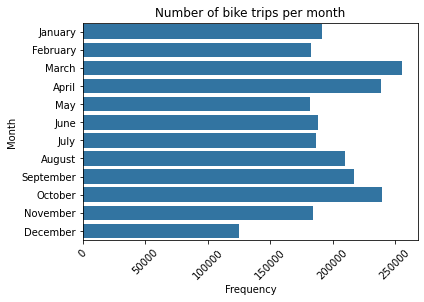

In [60]:
# Plot
base_color = sb.color_palette()[0]
sb.countplot(data=data, y='start_month', color=base_color).set(title='Number of bike trips per month')
plt.xlabel('Frequency')
plt.ylabel('Month')
plt.xticks(rotation=45)

> __Conclusion__ <br> The bike sharing system is used most during the months of March, April and October and least during December.

#### 5. Distribution of bike-trip frequency by hour

In [61]:
# Exract hour from time 
data['start_hour'] = data['start_time'].dt.strftime('%H')                                          

Text(0, 0.5, 'Frequency')

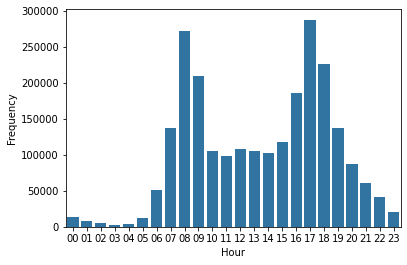

In [62]:
# Plot
sb.countplot(data=data, x='start_hour', color=base_color)
plt.xlabel('Hour')
plt.ylabel('Frequency')

> __Conclusion__ <br> During the day 2 peaks are observed, one in the morning (around 8-9) and one early in the evening (16-19). 

#### 6. Distribution of data on user information, including user_type, member_age, member_gender and rental_access_method. <br> 
> _Data on age and gender is only available for the month February. Data on rental method only for the months June, July and November._

#### 6a. User type

In [63]:
def percentage_plot(df):
    # Plot data
    df.plot.bar(color=base_color)

    # Print the proportion text on the bars
    for i in range (df.shape[0]):
        freq = df[i]
        # Convert into string
        freq_string = '{:0.1f}%'.format(freq)
        # Print the string value on the bar. 
        plt.text(i-0.05, y=freq+1.5, s=freq_string, va='center')

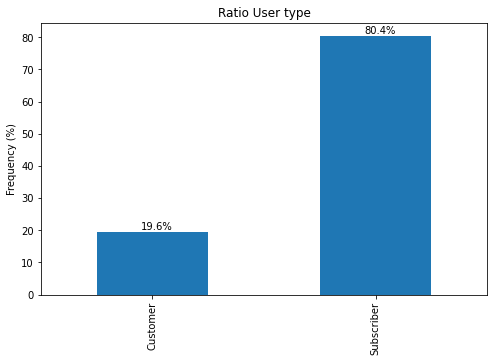

In [64]:
# Get percentage for user type
df = data.user_type.value_counts(normalize=True, sort=False)*100

# Create figure
fig = plt.figure(figsize=[8,5])

# Plot 
percentage_plot(df)

# Adjust graph settings
plt.title('Ratio User type')
plt.ylabel('Frequency (%)')
plt.show()

#### 6b. Age

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6990e+03,
        5.7020e+03, 8.1000e+03, 1.5047e+04, 1.7537e+04, 1.7094e+04,
        1.9133e+04, 1.5955e+04, 1.3561e+04, 1.0927e+04, 9.3380e+03,
        6.5750e+03, 5.1360e+03, 5.1300e+03, 3.9790e+03, 3.5080e+03,
        3.3390e+03, 2.3020e+03, 2.7320e+03, 2.1040e+03, 1.6270e+03,
        1.1340e+03, 1.1960e+03, 4.3500e+02, 3.4700e+02, 3.5800e+02,
        1.5000e+02, 1.5400e+02, 1.0700e+02, 5.1000e+01, 9.0000e+00,
        1.4000e+01, 0.0000e+00, 2.0000e+00, 2.0000e+01, 9.0000e+01,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1000e+01, 5.9000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00]),
 array([  0.,   2.,   4., 

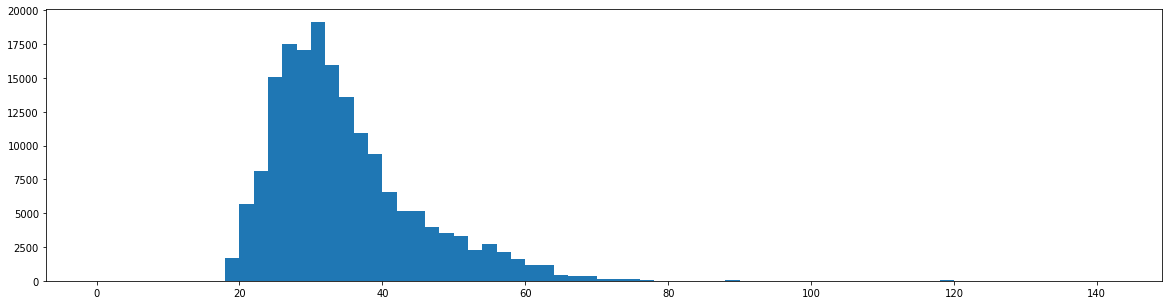

In [65]:
# Dataframe isolating the days with info on Age and Gender
data_member = data[(data['member_age'].notnull()) & (data['member_gender'].notnull())]

# Histogram Age
fig = plt.figure(figsize=[20,5])
binsize = 2
bins = np.arange(0, data_member['member_age'].max()+binsize, binsize)
plt.hist(data=data_member, x='member_age', bins=bins)

([], [])

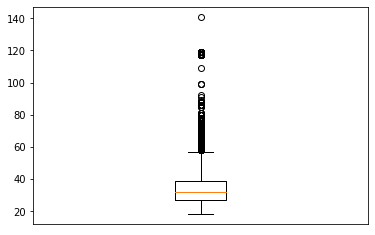

In [66]:
# Boxplot Age
plt.boxplot(data=data_member, x='member_age')
plt.xticks([])

In [67]:
# Outliers Age
outliers(data_member, 'member_age')

Number of lower outliers: 0
Number of upper outliers: 5771
Percentage outliers = 3.303963496670846

Descriptive statistics for lower outliers:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: member_age, dtype: float64

Descriptive statistics for upper outliers:
count    5771.000000
mean       63.796569
std         8.348737
min        58.000000
25%        59.000000
50%        62.000000
75%        65.000000
max       141.000000
Name: member_age, dtype: float64


> Again, I think the IQR method for outliers is too crude, with too great a chance of throwing away valuable information. Nevertheless, some values are unlikely, if not impossible. This applies to ages over 100, but presumably also over 80. While it is technically possible for people over 80 to have used the bike sharing system, I estimate the probability small and expect these age values to be registered incorrectly. Discarding ages over 80 will only be done for the data_member dataframe, not for the entire dataframe. This because, regardless of the user's age being correct or not, the bike trips are still valid for all other analysis. 

In [68]:
# Update dataframe (only keep members of 80 years and below)
data_member = data_member[data_member['member_age'] <= 80]

In [69]:
# Check 
data_member[data_member['member_age'] > 80]

,duration_sec,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,bike_share_for_all_trip,rental_access_method,member_birth_year,member_age,member_gender,start_date,start_day,start_day_type,start_month,start_hour


(array([    0.,  1699.,  5702.,  8100., 15047., 17537., 17094., 19133.,
        15955., 13561., 10927.,  9338.,  6575.,  5136.,  5130.,  3979.,
         3508.,  3339.,  2302.,  2732.,  2104.,  1627.,  1134.,  1196.,
          435.,   347.,   358.,   150.,   154.,   107.,    51.,    20.]),
 array([16., 18., 20., 22., 24., 26., 28., 30., 32., 34., 36., 38., 40.,
        42., 44., 46., 48., 50., 52., 54., 56., 58., 60., 62., 64., 66.,
        68., 70., 72., 74., 76., 78., 80.]),
 <BarContainer object of 32 artists>)

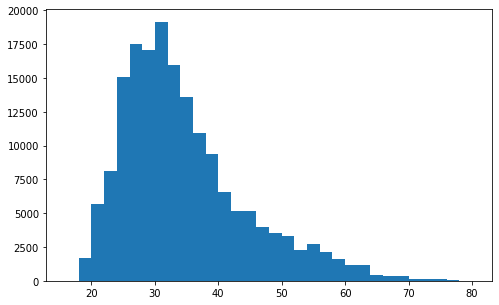

In [70]:
# Histogram  Age, without outliers
fig = plt.figure(figsize=[8,5])
binsize = 2
bins = np.arange(data_member['member_age'].min()-binsize, data_member['member_age'].max()+binsize, binsize)
plt.hist(data=data_member, x='member_age', bins=bins)

In [208]:
data_member['member_age'].describe()

count    174477.000000
mean         34.127306
std           9.877963
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          80.000000
Name: member_age, dtype: float64

> After discarding some outliers, the distribution looks more normal, althought still slightly right-skewed with most users being on the young side.  

#### 6c. Gender

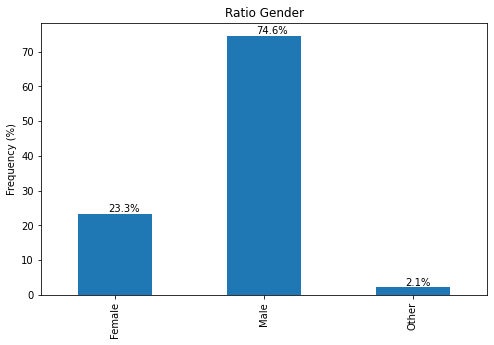

In [71]:
# Get percentage for gender type
df = data_member.member_gender.value_counts(normalize=True, sort=False)*100

# Create figure
fig = plt.figure(figsize=[8,5])

# Plot 
percentage_plot(df)

# Adjust graph settings
plt.title('Ratio Gender')
plt.ylabel('Frequency (%)')
plt.show()

#### 6d. Rental access method 

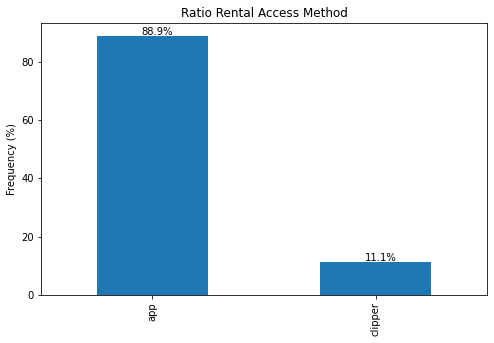

In [72]:
# Get percentage for user type
df = data.rental_access_method.value_counts(normalize=True, sort=False)*100

# Create figure
fig = plt.figure(figsize=[8,5])

# Plot 
percentage_plot(df)

# Adjust graph settings
plt.title('Ratio Rental Access Method')
plt.ylabel('Frequency (%)')
plt.show()

> __Conclusion__ <br> 
- 19.6% of the users is a customer and 80.4% a subscriber
- The distribution of age was right-skewed with a peak around the age of 30. Some outliers on the far upper end (>80 years) were discarded, making the data look more normally distributed. 
- Three types of gender were detected in the database: female (23.3%), male (74.6%) and other (2.1%)
- Most users accessed the bikes through the app (88.9%), the rest used a clipper (11.1%)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distributions of the variable duration was right-skewed with a long tail towards the upper end. Possible outliers were difficult to define. Instead a log transform worked well, showing a peak around 6-7 minutes. For comparison, a database without outliers (according to the IQR method) will be used in addition to the log transformed complete dataset. 

> New columns were created with extracted information from start_time: date, month, day,  day_type (weekend/weekday) and hour

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of age was right-skewed with some unbelievably high age values (e.g. 141 years). I tried again to use the IQR method for outliers but it was detecting more outliers than I believed acceptable. Instead I decided to discard all users above 80 years, as I considered it too be unlikely for people above 80 to have used the bike sharing system.

## Bivariate Exploration

#### Question 1. Does the duration of bike trips fluctuates throughout the day, week and year?

([<matplotlib.axis.YTick at 0x7f2164227ac8>,
 [Text(0, 1.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 100.0, '100'),
  Text(0, 1000.0, '1000')])

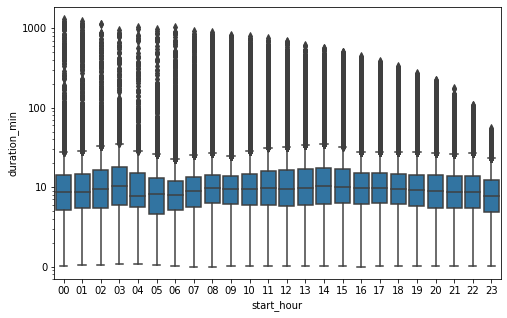

In [73]:
# Boxplot trip duration versus hour of the day
fig = plt.figure(figsize=[8,5])
sb.boxplot(x=data.start_hour, y=data.duration_min, color=base_color)
plt.yscale('log')
plt.yticks([1e0, 1e1, 1e2, 1e3], [0, 10, 100, 1000])

In [74]:
def remove_outliers(df, column_name):
    # Takes a dataframe and column name and returns a dataframe without outliers
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3-q1

    df_no_outliers = df[(df[column_name] > (q1-1.5*iqr)) & (df[column_name] < (q3+1.5*iqr))]
    count = df.shape[0] - df_no_outliers.count()[0]
    
    print('Number of outliers: ' + str(count))
    
    return(df_no_outliers)    

In [75]:
# Create dataframe without outliers
df_no_outliers = remove_outliers(data, 'duration_min')

Number of outliers: 131969


<AxesSubplot:xlabel='start_hour', ylabel='duration_min'>

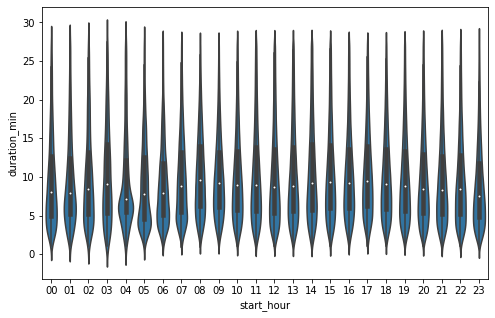

In [76]:
# Boxplot trip duration versus hour of the day (without outliers)
fig = plt.figure(figsize=[8,5])
sb.violinplot(x=df_no_outliers.start_hour, y=df_no_outliers.duration_min, color=base_color)

> Neither plots, with outliers/log tranformed and without outliers, indicate any strong differences in bike trip duration throughout the day. However looking closely at the plot without ouliers, it is possible to see the wavy pattern also seen in trip frequency, where a peak is seen around 8am and 7 pm. A majority of the timepoints shows a distribution shape with a broader bottom, so more data in the lower range and a long narrow tail towards the upper range. 

> From the univariate plots we saw that most bike trips are made during the week in the morning and evening rush, suggesting that the bikes are used for going to work. It would be interesting to see whether the bike trips made during the peak hours are shorter or longer than for other trips. I'll first explore if the duration of bike trips differs between weekdays and weekends.

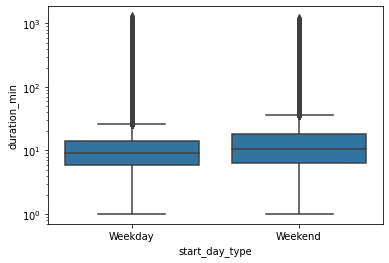

In [77]:
# Plot duration for weekdays and weekends on a log scale
sb.boxplot(x=data.start_day_type, y=data.duration_min, color=base_color)
plt.yscale('log')

Number of outliers: 131969


<AxesSubplot:xlabel='start_day_type', ylabel='duration_min'>

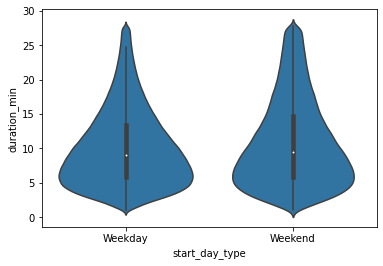

In [78]:
# First re-assign df without outliers, as data has changed
df_no_outliers = remove_outliers(data, 'duration_min')
# Same plot without outliers, on a normal scale
sb.violinplot(x=df_no_outliers.start_day_type, y=df_no_outliers.duration_min, color=base_color)

> The duration of the bike trips on weekends may be slightly higher than on weekdays. Of the dataset without outliers I made a violinplot to see the shape distribution and this shows a slight difference between weekdays and weekends. In the lower duration range the shape of the weekday group is broader and it runs smaller towards the higher end. On weekends the shape shows a less strong difference between the shorter and longer bike trip durations, and compared to weekdays the shape at the higher end is slightly broader. Let's check the duration of bike trips throughout the day on weekdays and weekends. 

In [79]:
# Create weekday and weekend dataframe
weekday = data[data['start_day_type'] == 'Weekday']
weekend = data[data['start_day_type'] == 'Weekend']

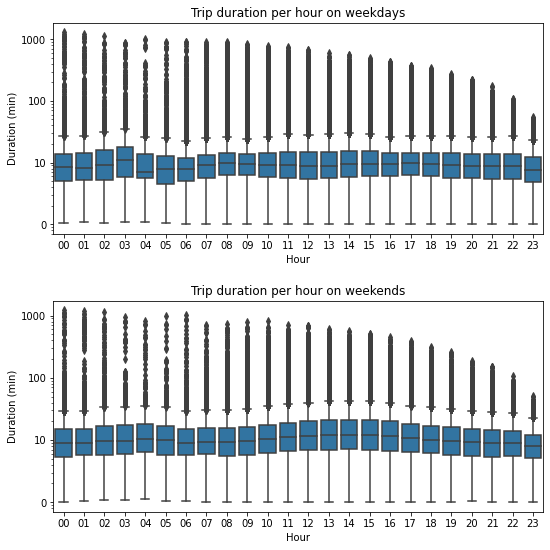

In [80]:
# Plot trip duration per hour for weekdays and weekends
fig = plt.figure(figsize=[8,8])

# subplot 1: duration versus hour for weekdays
plt.subplot(2,1,1)
sb.boxplot(x=weekday.start_hour, y=weekday.duration_min, color=base_color)
plt.yscale('log')
plt.yticks([1e0, 1e1, 1e2, 1e3], [0, 10, 100, 1000])
plt.title('Trip duration per hour on weekdays')
plt.ylabel('Duration (min)')
plt.xlabel('Hour')

# subplot 2: duration versus hour for weekends
plt.subplot(2,1,2)
sb.boxplot(x=weekend.start_hour, y=weekend.duration_min, color=base_color)
plt.yscale('log')
plt.title('Trip duration per hour on weekends')
plt.yticks([1e0, 1e1, 1e2, 1e3], [0, 10, 100, 1000])
plt.ylabel('Duration (min)')
plt.xlabel('Hour')
fig.tight_layout(pad=2.0)
plt.show()

In [81]:
# Create weekday and weekend dataframe without outliers
weekday_no_outl = df_no_outliers[df_no_outliers['start_day_type'] == 'Weekday']
weekend_no_outl = df_no_outliers[df_no_outliers['start_day_type'] == 'Weekend']

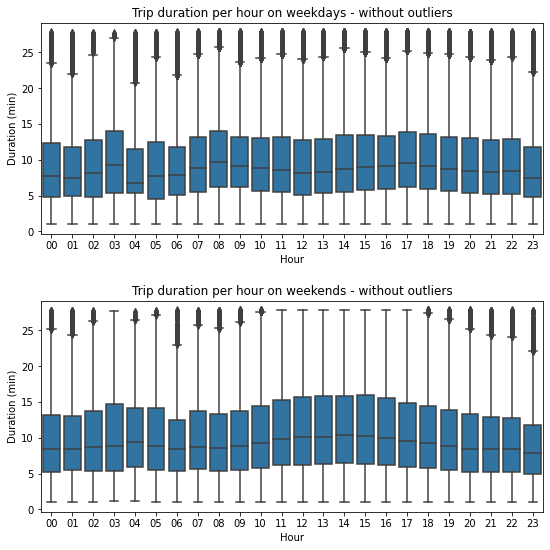

In [82]:
# Plot trip duration per hour for weekdays and weekends - no outliers!
fig = plt.figure(figsize=[8,8])

# subplot 1: duration versus hour for weekdays
plt.subplot(2,1,1)
sb.boxplot(x=weekday_no_outl.start_hour, y=weekday_no_outl.duration_min, color=base_color)
plt.title('Trip duration per hour on weekdays - without outliers')
plt.ylabel('Duration (min)')
plt.xlabel('Hour')

# subplot 2: duration versus hour for weekends
plt.subplot(2,1,2)
sb.boxplot(x=weekend_no_outl.start_hour, y=weekend_no_outl.duration_min, color=base_color)
plt.title('Trip duration per hour on weekends - without outliers')
plt.ylabel('Duration (min)')
plt.xlabel('Hour')
fig.tight_layout(pad=2.0)
plt.show()

> Interestingly, bike durations seem to follow the same pattern as frequency, with on moments of higher use also longer bike trips. This is most clearly seen in the plot without outliers.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

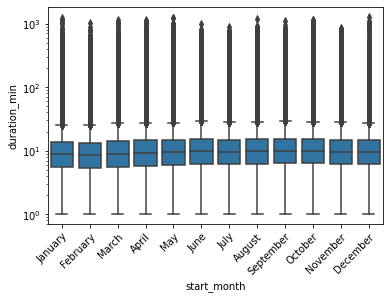

In [83]:
# Plot duration versus month, on a log scale
sb.boxplot(x=data.start_month, y=data.duration_min, color=base_color)
plt.yscale('log')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

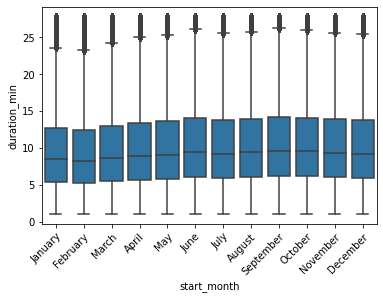

In [84]:
# Same plot without outliers, on a normal scale
sb.boxplot(x=df_no_outliers.start_month, y=df_no_outliers.duration_min, color=base_color)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

> Throughout the year bike trip durations do not seem to change. <br> 

> Underneath an overview plot of the results that came out of the analysis on bike trip duration. 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator


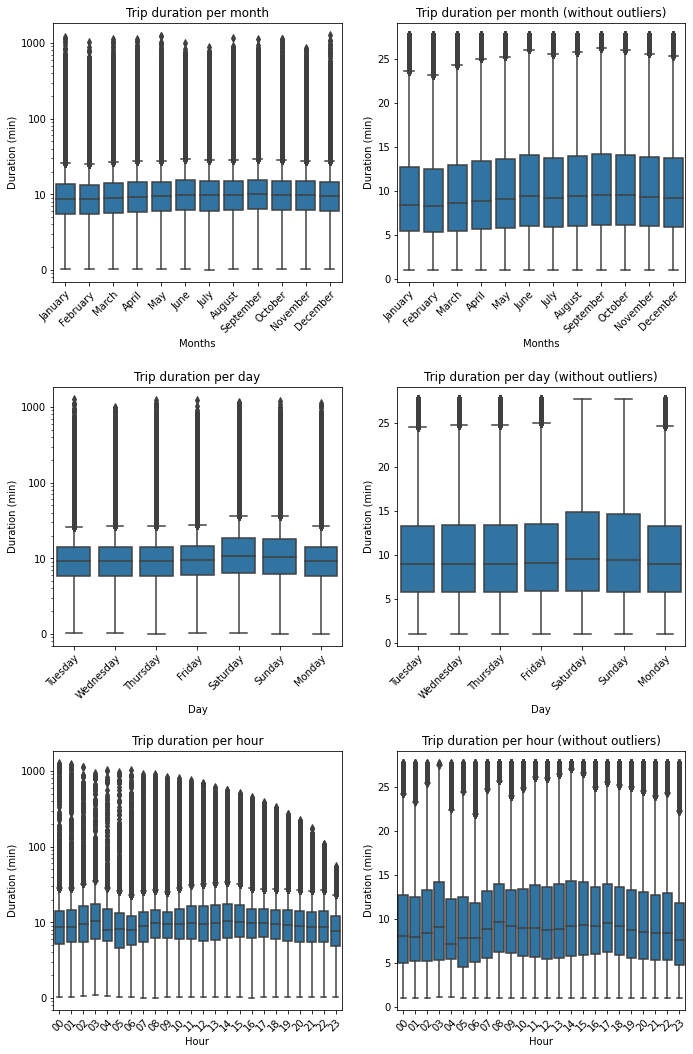

In [85]:
# Plot trip duration per hour for weekdays and weekends
#fig = plt.figure(figsize=[20,10])
fig, ax = plt.subplots(3,2, figsize=[10,15])

xlabels_month = data.start_month.unique().tolist()
xlabels_day = data.start_day.unique().tolist()
xlabels_hour = data.start_hour.unique().tolist()

# subplot 1: duration versus month (log scale)
sb.boxplot(x=data.start_month, y=data.duration_min, color=base_color, ax=ax[0,0])
ax[0,0].set_yscale('log')
ax[0,0].set_yticklabels([0, 0, 0, 10, 100, 1000])
ax[0,0].set_title('Trip duration per month')
ax[0,0].set_ylabel('Duration (min)')
ax[0,0].set_xlabel('Months')
ax[0,0].set_xticklabels(xlabels_month, rotation=45, ha='right', rotation_mode='anchor')

# subplot 2: duration versus month (not outliers/normal scale)
sb.boxplot(x=df_no_outliers.start_month, y=df_no_outliers.duration_min, color=base_color, ax=ax[0,1])
ax[0,1].set_title('Trip duration per month (without outliers)')
ax[0,1].set_ylabel('Duration (min)')
ax[0,1].set_xlabel('Months')
ax[0,1].set_xticklabels(xlabels_month, rotation=45, ha='right', rotation_mode='anchor')

# subplot 3: duration versus day (log scale)
sb.boxplot(x=data.start_day, y=data.duration_min, color=base_color, ax=ax[1,0])                                                                  
ax[1,0].set_yscale('log')
ax[1,0].set_yticklabels([0, 0, 0, 10, 100, 1000])
ax[1,0].set_title('Trip duration per day')
ax[1,0].set_ylabel('Duration (min)')
ax[1,0].set_xlabel('Day')
ax[1,0].set_xticklabels(xlabels_day, rotation=45, ha='right', rotation_mode='anchor')

# subplot 4: duration versus day (not outliers/normal scale)
sb.boxplot(x=df_no_outliers.start_day, y=df_no_outliers.duration_min, color=base_color, ax=ax[1,1])
ax[1,1].set_title('Trip duration per day (without outliers)')
ax[1,1].set_ylabel('Duration (min)')
ax[1,1].set_xlabel('Day')
ax[1,1].set_xticklabels(xlabels_day, rotation=45, ha='right', rotation_mode='anchor')

# subplot 5: duration versus hour (log scale)
sb.boxplot(x=data.start_hour, y=data.duration_min, color=base_color, ax=ax[2,0])
ax[2,0].set_yscale('log')
ax[2,0].set_yticklabels([0, 0, 0, 10, 100, 1000])
ax[2,0].set_title('Trip duration per hour')
ax[2,0].set_ylabel('Duration (min)')
ax[2,0].set_xlabel('Hour')
ax[2,0].set_xticklabels(xlabels_hour, rotation=45, ha='right', rotation_mode='anchor')

# subplot 6: duration versus hour (not outliers/normal scale)
sb.boxplot(x=df_no_outliers.start_hour, y=df_no_outliers.duration_min, color=base_color, ax=ax[2,1])
ax[2,1].set_title('Trip duration per hour (without outliers)')
ax[2,1].set_ylabel('Duration (min)')
ax[2,1].set_xlabel('Hour')
ax[2,1].set_xticklabels(xlabels_hour, rotation=45, ha='right', rotation_mode='anchor')

plt.tight_layout(pad=2)
plt.show()

> Bike trip duration does not seem to depend on the months of the year. The variation in the data is big, and differences therefor hard to detect. However, a slight difference seems to occur between weekdays and weekends, with a higher trip duration on weekends. Likewise, slight differences are seen throughout the day, with higher trip durations around 3am, 8 am and 7 pm. Shortest trips occur around 11pm and 4 am. 

#### Question 2. Is there a difference between the weekend and weekdays regarding hourly bike-trips?

Text(0.5, 1.0, 'Number of Trips by Hour during Weekdays and Weekends')

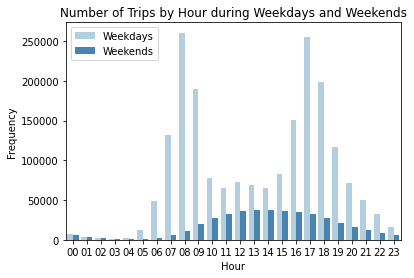

In [86]:
# Number of trips by hour during weekdays and weekends
sb.countplot(data=data, x='start_hour', hue='start_day_type', palette='Blues')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.legend(title='', labels=['Weekdays', 'Weekends'])
plt.title('Number of Trips by Hour during Weekdays and Weekends')

<AxesSubplot:xlabel='None-start_hour', ylabel='start_day'>

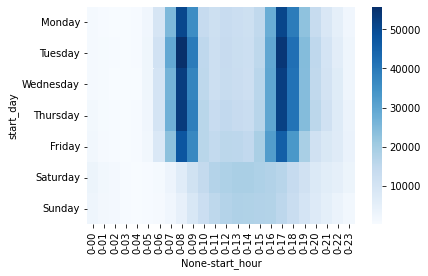

In [87]:
# Heatmap of number of trips by hour for different days
data_plot = data.groupby(["start_day", "start_hour"], sort=False).size().reset_index()
data_plot = data_plot.pivot("start_day", "start_hour")

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_plot = data_plot.reindex(order)
sb.heatmap(data_plot, cmap="Blues")

> The pattern of 2 peaks we saw in the univariate plots of bike trips by hour is again observable, but only on weekdays. The use of bikes peaks two times, one time in the morning (around 8am) and one time early evening (around 5pm). On weekends the graphs shows one very broad peak around mid-day. The heatmap confirms this and shows these two peaks on all weekdays, with only slightly lower peaks on Mondays and Fridays.  

#### Question 3. Is there a difference between months regarding hourly bike-trips?

<AxesSubplot:xlabel='None-start_hour', ylabel='start_month'>

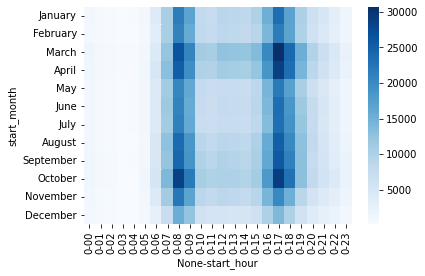

In [88]:
# Heatmap of number of trips by hour for different months
data_plot = data.groupby(["start_month", "start_hour"], sort=False).size().reset_index()
data_plot = data_plot.pivot("start_month", "start_hour")

order = data['start_month'].unique().tolist()
data_plot = data_plot.reindex(order)
sb.heatmap(data_plot, cmap="Blues")

> The pattern of two peaks in bike trip frequency during the day is observable all throughout the year. Higher peaks are seen in March, April and October, the lowest one in December.

#### Question 4. Do the number of bike trips and its duration depend on the type of user? 
Looking into the gender and age of the user, whether they are subscribers or customers and which access method they use. 

> _Data on gender and age is only available for the month February. Data on rental method only for the months June, July and November._

> Before starting, I would like to know if there is any relation between the different user variables. This is complicated by the fact that the different variables are not available for all months, neither for the same months. I will therefor check for the month February whether age, gender and user type show some correlation. And for the remaining months I will see what is the relation between user type and rental access method.  

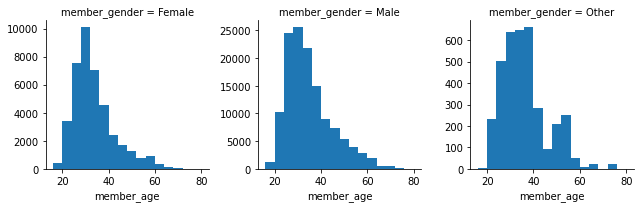

In [89]:
# Plot Facedgrid for gender and age
# Do not share y axis as the frequency of each gender is different and this distorts the visibility of the distribution
bin_edges = np.arange(data_member['member_age'].min()-2, data_member['member_age'].max()+2, 4)

g = sb.FacetGrid(data = data_member, col = 'member_gender', sharey=False) 
g.map(plt.hist, "member_age", bins = bin_edges)

<AxesSubplot:xlabel='member_gender', ylabel='member_age'>

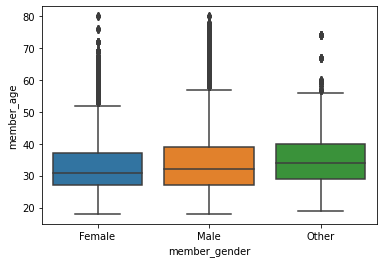

In [90]:
sb.boxplot(data=data_member, x='member_gender', y='member_age')

> The distributions look largely the same, especially for the male and female group. In the 'other' gender group the peak seems to come slightly later and the tail on the right side is disturbed with a small second peak around 55 years. On average male users may be slitghly older than female and the 'other' group slightly older than both male and female users. 

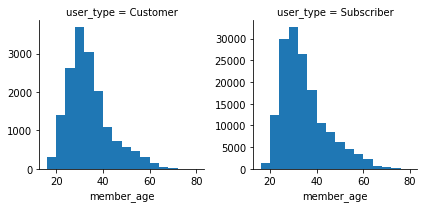

In [91]:
# Plot Facedgrid for user type and age
# Do not share y axis as the frequency of user type class is different and this distorts the visibility of the distribution
bin_edges = np.arange(data_member['member_age'].min()-2, data_member['member_age'].max()+2, 4)

g = sb.FacetGrid(data = data_member, col = 'user_type', sharey=False) 
g.map(plt.hist, "member_age", bins = bin_edges)

<AxesSubplot:xlabel='user_type', ylabel='member_age'>

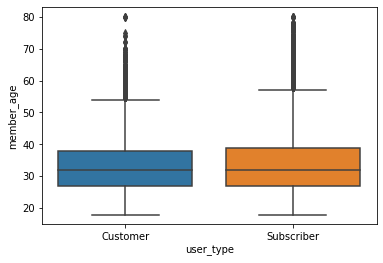

In [92]:
sb.boxplot(data=data_member, x='user_type', y='member_age')

> The age distribution for customers and subscribers looks similar. 

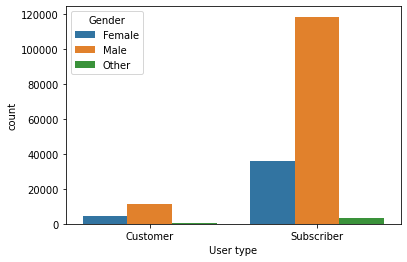

In [93]:
# Plot relationship user type and rental access method
sb.countplot(data=data_member, x='user_type', hue='member_gender')
plt.xlabel('User type')
plt.legend(title='Gender')

> Customers and subscribers are both mainly male, some are female and only few are 'other'

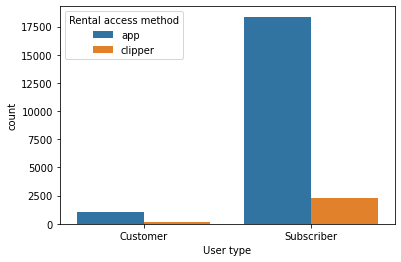

In [94]:
# Plot relationship user type and rental access method
sb.countplot(data=data, x='user_type', hue='rental_access_method')
plt.xlabel('User type')
plt.legend(title='Rental access method')

> Both customers and subscribers make more use of the app than the clipper for accessing the bikes. 

Text(0, 0.5, 'Count')

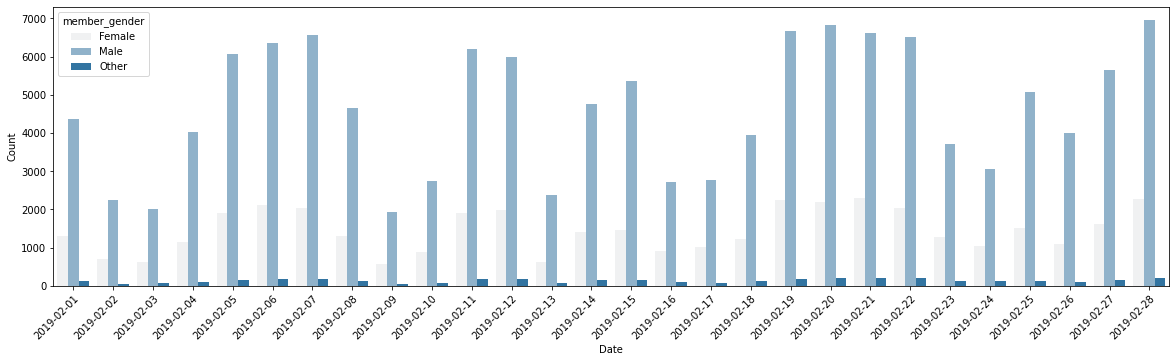

In [95]:
# Plot frequency of bike trips by date and gender in two ways. First barplot.
fig = plt.figure(figsize=[20,5])
ax = fig.add_axes([.125,.125,.775,.775])
base_color = sb.color_palette()[0]
sb.countplot(data = data_member, x = 'start_date', hue = 'member_gender', color=base_color)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor')
plt.xlabel('Date')
plt.ylabel('Count')

In [96]:
import sys
!{sys.executable} -m pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


Text(0.5, 1.0, 'Trip frequency by date and gender')

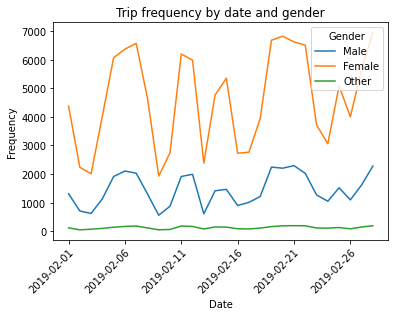

In [162]:
# Lineplot trip frequency by date and gender
trip_count = data_member.groupby(['start_date','member_gender']).size().reset_index(name='count')
sb.lineplot(data=trip_count, x=trip_count['start_date'].astype(str), y='count', hue='member_gender', legend=False)
plt.legend(title='Gender', labels=['Male', 'Female', 'Other'], loc='upper right')
plt.xticks(range(0,28,5), rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Trip frequency by date and gender')

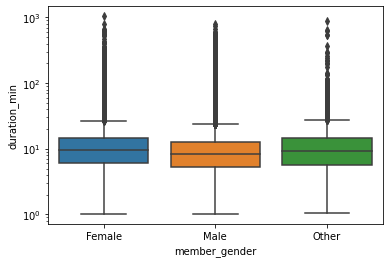

In [99]:
# Gender and trip duration
sb.boxplot(data=data_member, x='member_gender', y='duration_min')
plt.yscale('log')

Number of outliers: 9218


<AxesSubplot:xlabel='member_gender', ylabel='duration_min'>

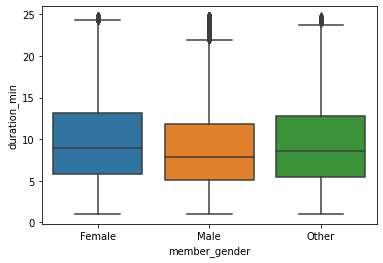

In [100]:
# Dataframe for member info - without ouliers
data_member_no_outliers = remove_outliers(data_member, 'duration_min')

# Gender and trip duration - without outliers
sb.boxplot(data=data_member_no_outliers, x='member_gender', y='duration_min')

> Male user might make slitghly shorter bike trips compared to female and other

Text(0.5, 1.0, 'Ratio User Gender for Weekdays and Weekends')

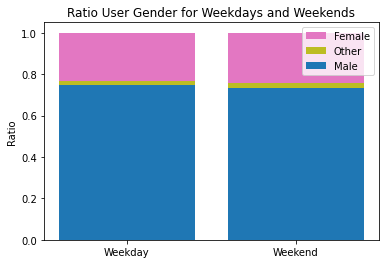

In [101]:
# Stacked plot for gender and weekday/weekend
cat1_order = data_member['start_day_type'].unique().tolist()
cat2_order = data_member['member_gender'].unique().tolist()

ref = []
baseline = np.zeros(len(cat1_order))
colors = ['#1f77b4', '#bcbd22', '#e377c2']

for i in range(len(cat2_order)):
    cat2 = cat2_order[i]
    # Count of first category of user type for the two categories of day type
    inner_counts = data_member[data_member['member_gender'] == cat2]['start_day_type'].value_counts()
    # Get percentage
    inner_props = inner_counts / data_member['start_day_type'].value_counts()
    bars = plt.bar(x=np.arange(len(cat1_order)), height = inner_props[cat1_order], bottom = baseline, color = colors[i])
    ref.append(bars)
    baseline += inner_props[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)   
plt.legend(reversed(ref), reversed(cat2_order))
plt.ylabel('Ratio')
plt.title('Ratio User Gender for Weekdays and Weekends')

> The graph shows that of the bike users who registered their gender, the majority were male individuals. Unfortunatly these data only represent the month February. Whether it is a general trend that the bike sharing system is mainly used by men cannot be concluded here. Regardless of gender (male/female), the behaviour of the users seems the same, with more bikes trips made during some days than others (see the synchronized peaks in the line graph) and on average the same trip duration. The ratio male, female and other is similar between weekdays and the weekend.

<AxesSubplot:xlabel='member_age', ylabel='duration_min'>

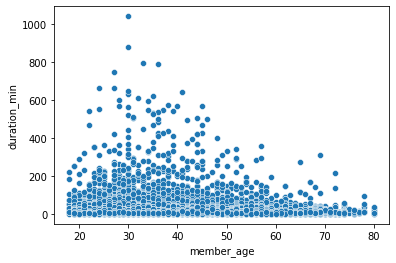

In [176]:
# Plot age versus trip duration
sb.scatterplot(data = data_member, x='member_age', y='duration_min')

<AxesSubplot:xlabel='member_age', ylabel='duration_min'>

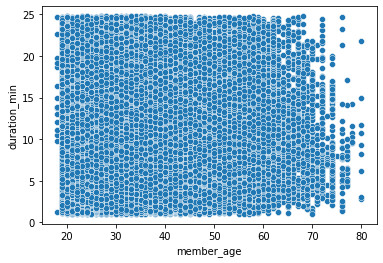

In [177]:
# Plot age versus trip duration - without outliers
sb.scatterplot(data = data_member_no_outliers, x='member_age', y='duration_min')

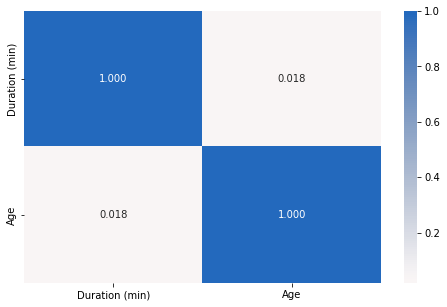

In [102]:
# Correlation plot for age and duration
plt.figure(figsize = [8, 5])
sb.heatmap(data_member[['duration_min', 'member_age']].corr(), xticklabels = ['Duration (min)', 'Age'], yticklabels = ['Duration (min)', 'Age'], annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0) # Add data value to cell, with 3 decimals. Centered at 0.  
plt.show()

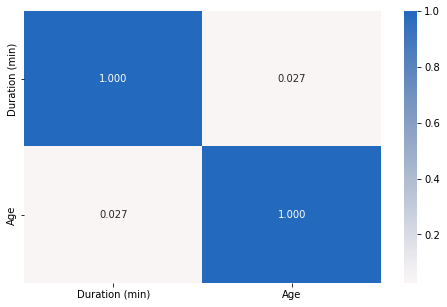

In [103]:
# Correlation plot for age and duration
plt.figure(figsize = [8, 5])
sb.heatmap(data_member_no_outliers[['duration_min', 'member_age']].corr(), xticklabels = ['Duration (min)', 'Age'], yticklabels = ['Duration (min)', 'Age'], annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0) # Add data value to cell, with 3 decimals. Centered at 0.  
plt.show()

> Both scatterplot and heatmap show very clearly that there is no correlation between a user's age and trip duration.

<AxesSubplot:xlabel='user_type', ylabel='count'>

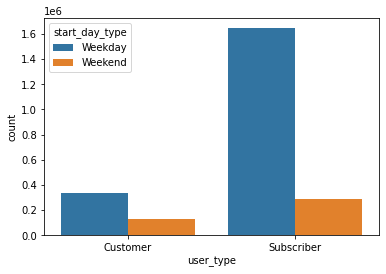

In [210]:
sb.countplot(data=data, x='user_type', hue='start_day_type')

Text(0.5, 1.0, 'Trip duration versus User type')

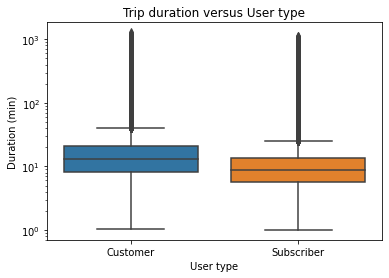

In [104]:
# User type and trip duration
sb.boxplot(data=data, x='user_type', y='duration_min')
plt.yscale('log')
plt.ylabel('Duration (min)')
plt.xlabel('User type')
plt.title('Trip duration versus User type')

Text(0.5, 1.0, 'Trip duration versus User type')

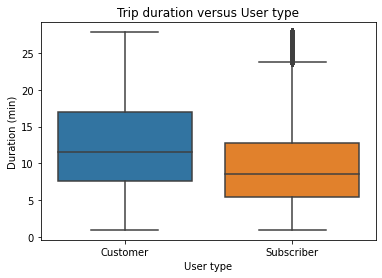

In [105]:
# User type and trip duration - without ouliers
sb.boxplot(data = df_no_outliers, x='user_type', y='duration_min')
plt.ylabel('Duration (min)')
plt.xlabel('User type')
plt.title('Trip duration versus User type')

> Customers seem to make slightly longer bike trips than subscribers

Text(0.5, 1.0, 'Ratio Weekday/Weekend use for User type')

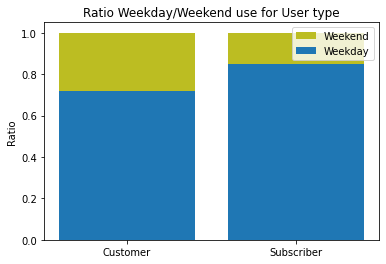

In [211]:
# User type
cat1_order = data['user_type'].unique().tolist()
cat2_order = data['start_day_type'].unique().tolist()

ref = []
baseline = np.zeros(len(cat1_order))
colors = ['#1f77b4', '#bcbd22', '#e377c2']

for i in range(len(cat2_order)):
    cat2 = cat2_order[i]
    # Count of first category of user type for the two categories of day type
    inner_counts = data[data['start_day_type'] == cat2]['user_type'].value_counts()
    # Get percentage
    inner_props = inner_counts / data['user_type'].value_counts()
    bars = plt.bar(x=np.arange(len(cat1_order)), height = inner_props[cat1_order], bottom = baseline, color = colors[i])
    ref.append(bars)
    baseline += inner_props[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)   
plt.legend(reversed(ref), reversed(cat2_order), title='')
plt.ylabel('Ratio')
plt.title('Ratio Weekday/Weekend use for User type')

> The ratio subscribers and customers is slightly different between weekdays and weekends, with relatively more customers on weekends than weekdays. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> __Question 1. Does the duration of bike trips fluctuates throughout the day, week and year?__ <br> Bike trip duration does not seem to depend on the months of the year. The variation in the data is big, and differences therefor hard to detect. A small difference may occur between weekdays and weekends, with a slightly higher trip duration on weekends. Likewise, small differences are seen throughout the day, with slightly higher trip durations around 3am, 8 am and 7 pm. Shortest trips occur around 11pm and 4 am.  <br> 
> __Question 2. Is there a difference between the weekend and weekdays regarding hourly bike-trips?__ <br> Yes, during weekdays there are two peak in the day at which most bike trips are started, one in the morning around 8 and one in the evening around 5. This has likely to do with people using the bike to go to work. On weekends the peak falls around mid-day and is more spread. <br>
> __Question 3. Is there a difference between months regarding hourly bike-trips?__ <br> While the peaks of bike use may be higher in some months than others, the pattern remains the same, regardless of the month.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> __Question 4. Do the number of bike trips and its duration depend on the type of user?__ <br> Most striking here was the difference in trip duration between costumers and subscribers. It seems that costumers make on average longer bike trips than subscribers. Small differences are seen between gender and age, with male and other being slightly older than female users. Male users may also make shorter bike trips on average. Age and trip duration did not seem to correlate. Statistical testing will need to show how strong all those differences are. 

## Multivariate Exploration

In [112]:
from matplotlib.colors import LogNorm, Normalize

<AxesSubplot:xlabel='start_hour', ylabel='start_day'>

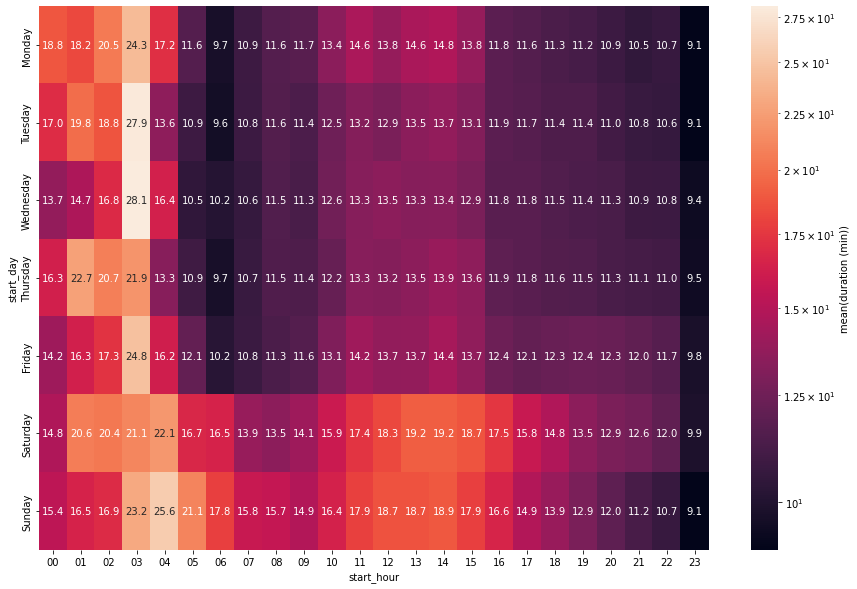

In [113]:
# Heatmap of duration of trips by hour for different days
fig = plt.figure(figsize=[15,10])
duration_means = data.groupby(["start_day", "start_hour"]).mean()['duration_min']
duration_means = duration_means.reset_index(name = 'duration_min_avg')
duration_means = duration_means.pivot(index = 'start_day', columns = 'start_hour', values = 'duration_min_avg')

duration_means = duration_means.reindex(order_days)

sb.heatmap(duration_means, annot = True, fmt = '.1f', cbar_kws = {'label' : 'mean(duration (min))'}, norm=LogNorm())

<AxesSubplot:xlabel='start_hour', ylabel='start_day'>

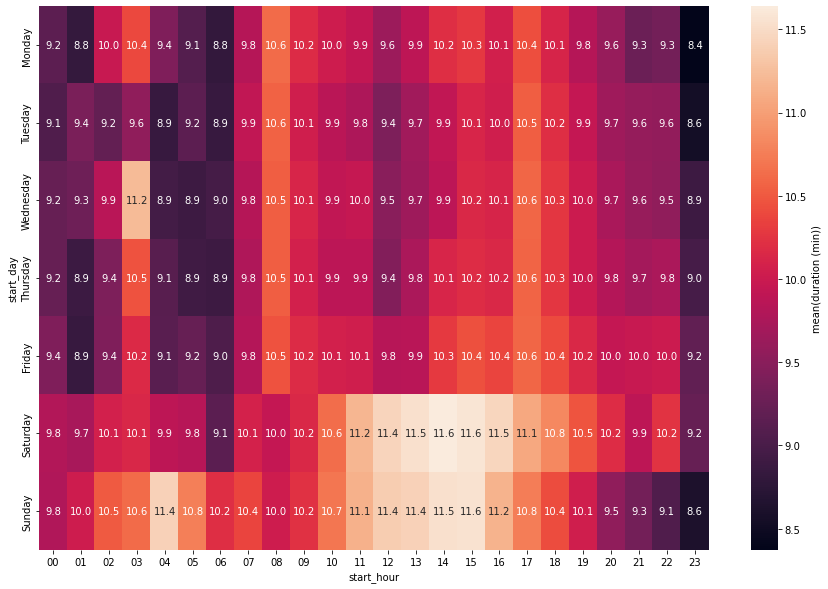

In [114]:
# Heatmap of duration of trips by hour for different days - no outliers
fig = plt.figure(figsize=[15,10])
duration_means = df_no_outliers.groupby(["start_day", "start_hour"]).mean()['duration_min']
duration_means = duration_means.reset_index(name = 'duration_min_avg')
duration_means = duration_means.pivot(index = 'start_day', columns = 'start_hour', values = 'duration_min_avg')

duration_means = duration_means.reindex(order_days)

sb.heatmap(duration_means, annot = True, fmt = '.1f', cbar_kws = {'label' : 'mean(duration (min))'})

> The heatmaps for mean trip duration by hour and by day look different when plotted with or without outliers. First of all, the heatmap for data including outliers gives a much better view on the data then the earlier boxplots in the bivariate exploration section. It also reveals how much effect removing outliers has on the interpretation of the data. <br> 

> Something similar in both heatmaps is the 'messy' left side during weekdays, correpsonding to the first few hours of the night (between 00 and 04). Here, average trip durations may differ greatly from hour to hour. 

> In the first heatmap (with outliers) the lowest trip duration, on average, are made at 6am and 11pm. In between it reaches a peak around 1pm. In the heatmap of data durations without outliers the shortest trips are also made around 6am and 11pm. However, in between 6am and 11pm two peaks are seen, one around 8am and one around 5pm. The conclusion that may be drawn about the relation between trip duration and hour is therefor completely dependent on whether or not to include outliers in the data. 

> On weekends a similar patterns is seen, regardless of discarding outliers or not. On average the longest bike trip are made around 2pm, and the shortest around 11pm. 

Text(0.5, 0, 'Day')

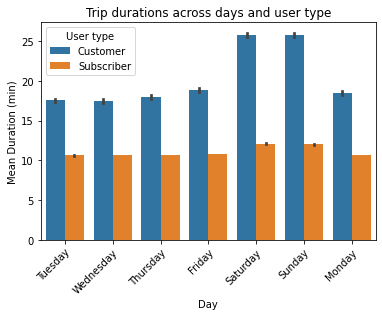

In [115]:
sb.barplot(data = data, x = 'start_day', y = 'duration_min', hue = 'user_type')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.legend(title='User type')
plt.ylabel('Mean Duration (min)')
plt.title('Trip durations across days and user type')
plt.xlabel('Day')

Text(0.5, 0, 'Day')

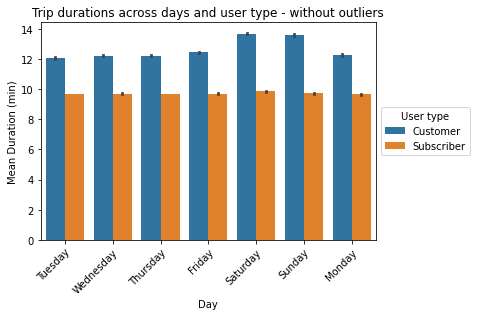

In [116]:
# Plot 
sb.barplot(data = df_no_outliers, x = 'start_day', y = 'duration_min', hue = 'user_type')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.legend(title='User type', bbox_to_anchor = (1, 0.5), loc = 6)
plt.ylabel('Mean Duration (min)')
plt.title('Trip durations across days and user type - without outliers')
plt.xlabel('Day')

> Costumers make on average longer bike trips than subscribers, irrespective of the day of the week. On weekends the difference is the largest. Removing outliers does not change this conclusion.

Text(0.5, 1.0, 'Trip duration by date and gender')

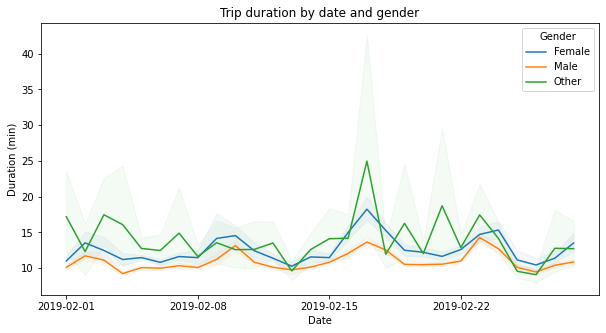

In [181]:
# Lineplot for trip duration by date and gender
fig = plt.figure(figsize=[10,5])
sb.lineplot(data=data_member, x=data_member['start_date'].astype(str), y='duration_min', hue='member_gender', err_kws = {'alpha': 0.05})
plt.legend(title='Gender', loc='upper right')
plt.xticks(range(0,28,7), ha='center')
plt.xlabel('Date')
plt.ylabel('Duration (min)')
plt.title('Trip duration by date and gender')

Text(0.5, 1.0, 'Trip duration by date and gender')

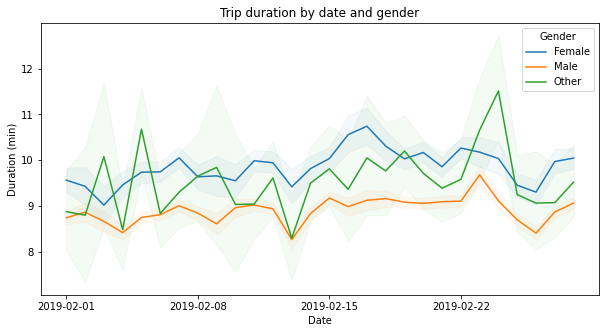

In [214]:
# Lineplot for trip duration by date and gender
fig = plt.figure(figsize=[10,5])
sb.lineplot(data=data_member_no_outliers, x=data_member_no_outliers['start_date'].astype(str), y='duration_min', hue='member_gender', err_kws = {'alpha': 0.05})
plt.legend(title='Gender', loc='upper right')
plt.xticks(range(0,28,7), ha='center')
plt.xlabel('Date')
plt.ylabel('Duration (min)')
plt.title('Trip duration by date and gender')

> It seems that male users make on average slightly shorter bike trips than female users, regardless of the day. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The heatmaps for mean trip duration by hour and by day look different when plotted with or without outliers. First of all, the heatmap for data including outliers gives a much better view on the data then the earlier boxplots in the bivariate exploration section. It also reveals how much effect removing outliers has on the interpretation of the data. <br> 

> Something similar in both heatmaps is the 'messy' left side during weekdays, correpsonding to the first few hours of the night (between 00 and 04). Here, average trip durations may differ greatly from hour to hour. 

> In the first heatmap (with outliers) the lowest trip duration, on average, are made at 6am and 11pm. In between it reaches a peak around 1pm. In the heatmap of data durations without outliers the shortest trips are also made around 6am and 11pm. However, in between 6am and 11pm two peaks are seen, one around 8am and one around 5pm. The conclusion that may be drawn about the relation between trip duration and hour is therefor completely dependent on whether or not to include outliers in the data. 

> On weekends a similar patterns is seen, regardless of discarding outliers or not. On average the longest bike trip are made around 2pm, and the shortest around 11pm. 

> Costumers make on average longer bike trips than subscribers, irrespective of the day of the week. On weekends the difference is the largest. Removing outliers does not change this conclusion.

> It seems that male users make slightly shorter bike trips than female users, on every day of the month. 

### Were there any interesting or surprising interactions between features?

> Not necessarily an interaction, but the effect of the exclusion of outliers on the interpretation of the heatmaps striked me. During the previous exploration steps this effect did not come forward, not for me at least. 

## Conclusions
__When are the bikes used most and by who?__

Most bike trips are made during the week (82.5%), and more specifically during morning and evening rush hours (8am and 5 pm respectively). Of the trips made on weekends most start between 11am and 4pm, peaking at 2pm. This pattern is consistent throughout the year, although the absolute frequencies differ. In March the bikes are used most, after which April and October. December is the month with the least trips. The data indicate that the bikes from Bay Wheels are often used for going to work (whether to the public transport station or directly to the office), even during the holiday months. 
A majority of the users in 2019 (80.4%) was a subscriber, the rest a customer. While both subscribers and customers mainly use the bikes during the week, the percentage of customers that use the bike during the weekends is higher than for subscribers. From the available data on gender 74.6% was male, 23.3% female and 2.1% were defined as 'other'. Although the users are mainly male, the moments they use the bikes seem not different from female. Both make most trips during the weekdays and rush hours. Their mean age was 34 years, with a minimum age of 18 and a maximum age of 80*. To access the bikes most people used the app instead of the clipper (88.9% versus 11.1%). 

*Age data were not normally distributed and contained some outliers at the upper end, including age 140. Data over 80 were considered outliers and removed from analysis*

__Does the duration of trips differ depending on the hour, day, month, or on the type of user?__
The mean duration of bike trips in 2019 was 12.7 minutes, with a minimum of 1 and a maximum of 1293 minutes. As trip duration data were log normally distributed and contained some possible outliers to the far end that were difficult to define, the interaction of trip duration with other variables has been performed on dataframes both with and without outliers (based on the IQR method). 
Trip duration did not seem very strongly correlated with any of the other variable, but nevertheless some interesting patterns were observed. Depending on the hour of the day and the day of the week trip duration seems to change. However, the exact change has been difficult to interpret as data with and without outliers give contradictory results. Maintaining the dataset as is, so including possible outliers, the average bike trip seems to be longest between 11am and 3pm (outside of the long bike trips made during the night). This is irrespective of the day. Discarding outliers changes the pattern for weekdays completely, with the on average longest bike trips seen at rush hours (8am and 5pm). 
Of the different bike users, customers seem to make on average longer trips than subscribers, regardless of the day. On weekends this effect is even a little stronger. On average, bike trips made by male users seem to be slightly shorter than for female users, which is consistent over the entire month of February. The duration of bike trips does not correlate with age. 

In [215]:
# Save the most recent dataframe(s) for part II of this project
data.to_csv('2019_baywheels_tripdata_master.csv')
df_no_outliers.to_csv('2019_baywheels_tripdata_master_no_outliers.csv')
data_member.to_csv('2019_baywheels_tripdata_member')

In [ ]:
!jupyter nbconvert --to html --no-input --no-prompt Part_I_exploration_template.ipynb

[NbConvertApp] Converting notebook Part_I_exploration_template.ipynb to html
